In [1]:
%matplotlib inline

import traceback
import sys
import os

import numpy as np
import matplotlib.pyplot as plt
from IPython.core.magic import register_cell_magic
from IPython.display import display, Audio, Image

# Python and numpy

1. Organize Python modules
   1. Scripts
   2. Modules
   3. Package
2. Use numpy for array-oriented code
   1. Data type
   2. Construction
   3. Multi-dimensional arrays
   4. Selection
   5. Broadcasting
3. Use tools for numerical analysis
   1. Matplotlib
   2. Linear algebra using numpy ans scipy
   3. Package management wtih conda and pip

# Organize Python modules

* One file containing Python code as a **script**
* One Python file is a “**module**”
* One directory containing Python files (satisfying some rules) is a “**package**”
* “Module” is usually used in a loose way to refer to things that may be imported by Python “import” statement.  Then a “module” can mean (the strictly defined) module or a package.

See examples in the [current directory](./)

# What is a script and how it works

* A script is a text file that the program loader sends to an engine (usually interpreter) to execute the content.
* Executable permission needs to be set for the shell to run it:

```
$ ls -al step0.py      # executable bit not set
-rw-r--r--  1 yungyuc  staff  574 Apr  7 22:18 step0.py
$ ./step0.py pstake.py # can't run without permission
-bash: ./step0.py: Permission denied
$ chmod a+x step0.py   # set the executable bit
$ ls -al step0.py      # executable bit is set
-rwxr-xr-x  1 yungyuc  staff  574 Apr  7 22:18 step0.py*
$ ./step0.py pstake.py # properly it runs
811 lines in pstake.py
```

# What’s a script

* Scripts usually are for automating repetitive work.
* Scripts should be short for quick implementation.

The leading line in a script that starts with `#!` is called the *shebang*.  It tells the program loader which executable to run for the script.

```python
#!/usr/bin/env python3
# ...
```

It won't work if executable permission isn't set on the script.

# Example: line counting (`step0`)

This is the first example: `step0.py` file in the [current directory](./).  It counts the number of lines in the file specified with the first argument.

In [2]:
!chmod u+x step0.py
!./step0.py pstake.py

811 lines in pstake.py


Another way, regardless the executable bit, to run the script is to explicitly call the Python executable.

In [3]:
!chmod u-x step0.py
!python3 step0.py pstake.py

811 lines in pstake.py


# One-liner

Python executable supports the <font color="red">**`-c`**</font> argument for one-liner.  The content of the script is passed from the command line.  It's called one-liner because it usually only takes one line.

One-liners are convenient for code that is only run once.  Quick to write but hard to read.

In [4]:
!python3 -c 'print(len(open("pstake.py").readlines()), "lines")'

811 lines


# Make a module

See the example file `step1.py` in the [current directory](./).  It factors out the line-counting code to a distinct function:

```python
def count_line(fname):
    if os.path.exists(fname):
        with open(fname) as fobj:
            lines = fobj.readlines()
        sys.stdout.write('{} lines in {}\n'.format(len(lines), fname))
    else:
        sys.stdout.write('{} not found\n'.format(fname))
```

The other code is for processing command-line arguments.  It's only useful for a script, so we move it into an `if` test:

```python
# This tests whether the code is evaluated as a script.
if __name__ == '__main__':
    if len(sys.argv) < 2:
        sys.stdout.write('missing file name\n')
    elif len(sys.argv) > 2:
        sys.stdout.write('only one argument is allowed\n')
    else:
        count_line(sys.argv[1])
```

# Different behaviors on import

Because **`step1`** checks for `__main__`, when it is imported as a module, nothing happens:

In [5]:
!python3 -c 'import step1'

But importing **`step0`** runs the code:

In [6]:
!python3 -c 'import step0' pstake.py

811 lines in pstake.py


To run the code defined in the **`step1`** module can only be run by explicitly calling the function:

In [7]:
!python3 -c 'import step1 ; step1.count_line("pstake.py")'

811 lines in pstake.py


But when running as a script, both behave the same:

In [8]:
!python3 step0.py pstake.py

811 lines in pstake.py


In [9]:
!python3 step1.py pstake.py

811 lines in pstake.py


# Run module as script

Python executable supports the **`-m`** argument.  It imports the script as a module, and still runs it as a script.

In [10]:
!python3 -m step1 pstake.py

811 lines in pstake.py


With `python -m`, `step0.py` and `step1.py` again behave the same:

In [11]:
!python3 -m step0 pstake.py

811 lines in pstake.py


# Make the module more like a library

It's common to further factor out the code for script to a **`main`** function.  See the example file `step2.py` in the [current directory](./).

```python
def main():
    if len(sys.argv) < 2:
        sys.stdout.write('missing file name\n')
    elif len(sys.argv) > 2:
        sys.stdout.write('only one argument is allowed\n')
    else:
        count_line(sys.argv[1])


# This tests whether the file is evaluated as a script.
if __name__ == '__main__':
    main()
```

The behavior is the same as **`step1`**:

In [12]:
# run as a script
!python3 step2.py pstake.py

811 lines in pstake.py


In [13]:
# run the module as a script
!python3 -m step2 pstake.py

811 lines in pstake.py


In [14]:
# only import the module
!python3 -c 'import step2'

In [15]:
# import and then run the new main function
!python3 -c 'import step2 ; step2.main()' pstake.py

811 lines in pstake.py


# Make a package

When the code grows to a point, you may need a directory to house it.  Let's use our simple example to show how to make a package.  See the [step3 example directory](./step3/).

No file in the package version `step3` can be run as a script.

In [16]:
# The package __init__.py doesn't work like a module.
!python3 step3/__init__.py numpy.ipynb

Traceback (most recent call last):
  File "step3/__init__.py", line 11, in <module>
    from ._core import count_line
ImportError: attempted relative import with no known parent package


Everything else remains working, including the `-m` option of Python executable.

In [17]:
!python3 -m step3 numpy.ipynb

1504 lines in numpy.ipynb


In [18]:
!python3 -c 'import step3 ; step3.main()' numpy.ipynb

1504 lines in numpy.ipynb


# A really useful script

Here is a real-world example (`pstake.py` in the [current directory](./)) for how to write a useful script: convert [pstricks](http://tug.org/PSTricks/main.cgi/) to an image file.

(`cce.tex`: A tex file using pstricks)

```tex
\psset{unit=2cm}
\begin{pspicture}(-3,-.5)(3,1.5)
  \psset{linewidth=1pt}
  \psset{linecolor=black}
  \psframe(-1,0)(1,1)
  \psline[linestyle=dashed](0,0)(0,1)
  \psframe[linestyle=dotted,linecolor=blue](-0.95,0.05)(-0.05,0.95)
  \rput[t](-0.5,0.9){$\mathrm{CE}_-$}
  \psframe[linestyle=dotted,linecolor=blue](0.05,0.05)(0.95,0.95)
  \rput[t](0.5,0.9){$\mathrm{CE}_+$}
  \psframe[linestyle=dotted,linecolor=red](-1.05,-0.05)(1.05,1.05)
  \rput[tr](-1.1,0.9){$\mathrm{CE}$}
  \psdots[dotstyle=*](0,1)(-1,1)(-1,0)(0,0)(1,0)(1,1)(0,1)
  \uput{0.1}[u](0,1){A $(x_j,t^n)$}
  \uput{0.1}[ul](-1,1){B}
  \uput{0.1}[dl](-1,0){$(x_{j-\frac{1}{2}},t^{n-\frac{1}{2}})$ C}
  \uput{0.1}[d](0,0){D}
  \uput{0.1}[dr](1,0){E $(x_{j+\frac{1}{2}},t^{n-\frac{1}{2}})$}
  \uput{0.1}[ur](1,1){F}
  \psline[linestyle=dashed](0,0)(0,1)
\end{pspicture}
```

In [19]:
!rm -f cce.png
!ls cce.png
!./pstake.py cce.tex cce.png 2>&1 > /dev/null
!ls -al cce.png
Image(url="cce.png", width=800)

ls: cce.png: No such file or directory
-rw-r--r--  1 yungyuc  staff  16720 Mar 15 18:02 cce.png


# Numpy for array-centric code

* Arrays are the best container to manage homogeneous data.
* The [numpy](http://www.numpy.org/) library provides everything we need for arrays in Python.
* Arrays use contigous memory, sequences don't.

In [20]:
# Make a list (one type of Python sequence) of integers.
lst = [1, 1, 2, 3, 5]
print('A list:', lst)

A list: [1, 1, 2, 3, 5]


In [21]:
# Import the numpy library. It's a universal convention to alias it to "np".
import numpy as np
# Make an array from the sequence.
array = np.array(lst)
print('An array:', np.array(array))

An array: [1 1 2 3 5]


# Key meta-data

In [22]:
array = np.array([[0, 1, 2], [3, 4, 5]])
print("shape:", array.shape)
print("size:", array.size)
print("nbytes:", array.nbytes)
print("itemsize:", array.itemsize)
print("dtype:", array.dtype)

shape: (2, 3)
size: 6
nbytes: 48
itemsize: 8
dtype: int64


# Data type

The numpy array is of type `numpy.ndarray`.  An `ndarray` has a property `dtype` for the data type the array uses:

In [23]:
print(type(array))
print(array.dtype)

<class 'numpy.ndarray'>
int64


`numpy.array` is the most basic `ndarray` constructor.  It detects the types in the input sequence data and choose the appropriate dtype for the constructed array.

In [24]:
array1 = np.array([1, 1, 2, 3, 5]) # only integer
print("only int:", array1, type(array1), array1.dtype)
array2 = np.array([1.0, 1.0, 2.0, 3.0, 5.0]) # only real
print("only real:", array2, type(array2), array2.dtype)
array3 = np.array([1, 1, 2, 3, 5.0]) # integer and real
print("int and real:", array3, type(array3), array3.dtype)

only int: [1 1 2 3 5] <class 'numpy.ndarray'> int64
only real: [1. 1. 2. 3. 5.] <class 'numpy.ndarray'> float64
int and real: [1. 1. 2. 3. 5.] <class 'numpy.ndarray'> float64


* A Python list doesn't know the type it contains, but an array does.
* The type information allows numpy to process the array data using pre-compiled C code.

# Construction

Numpy provides a lot of helpers to construct arrays ([see here](https://www.numpy.org/devdocs/reference/routines.array-creation.html)).  The 3 most common constructors are `empty`, `zeros`, and `ones`:

In [25]:
empty_array = np.empty(4)
print("It will contain garbage, but it doesn't waste time to initialize:", empty_array)
zeroed_array = np.zeros(4)
print("The contents are cleared with zeros:", zeroed_array)
unity_array = np.ones(4)
print("Instead of zeros, fill it with ones:", unity_array)
print("All of their data types are float64 (double-precision floating-point):",
      empty_array.dtype, zeroed_array.dtype, unity_array.dtype)

It will contain garbage, but it doesn't waste time to initialize: [5.e-324 5.e-324 5.e-324 0.e+000]
The contents are cleared with zeros: [0. 0. 0. 0.]
Instead of zeros, fill it with ones: [1. 1. 1. 1.]
All of their data types are float64 (double-precision floating-point): float64 float64 float64


* `full` is a shorthand for `empty` and `fill`:

In [26]:
empty_array = np.empty(4)
empty_array.fill(7)
print("Create an empty array and fill the value:", empty_array)
filled_array = np.full(4, 7)
print("Build an array populated with an arbitrary value:", filled_array)
filled_real_array = np.full(4, 7.0)
print("Build an array populated with an arbitrary real value:", filled_real_array)

Create an empty array and fill the value: [7. 7. 7. 7.]
Build an array populated with an arbitrary value: [7 7 7 7]
Build an array populated with an arbitrary real value: [7. 7. 7. 7.]


* `arange` builds a monotonically increasing array:

In [27]:
ranged_array = np.arange(4)
print("Build an array with range:", ranged_array)
ranged_real_array = np.arange(4.0)
print("Build with real range:", ranged_real_array)

Build an array with range: [0 1 2 3]
Build with real range: [0. 1. 2. 3.]


`linspace` returns an array whose elements are evenly placed in a closed interval:

In [28]:
linear_array = np.linspace(11, 13, num=6)
print("Create an equally-spaced array with 6 elements:", linear_array)

Create an equally-spaced array with 6 elements: [11.  11.4 11.8 12.2 12.6 13. ]


# Multi-dimensional arrays

* Multi-dimensional arrays are the building-block of matrices and linear algebra.  Much more useful than one-dimensional arrays.
* Create multi-dimensional arrays by stacking 1D:

In [29]:
ranged_array = np.arange(10)
print("A 1D array:", ranged_array)
hstack_array = np.hstack([ranged_array, ranged_array])
print("Horizontally stacked array:", hstack_array)
vstack_array = np.vstack([ranged_array, ranged_array])
print("Vertically stacked array:", vstack_array)

A 1D array: [0 1 2 3 4 5 6 7 8 9]
Horizontally stacked array: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Vertically stacked array: [[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]]


* `ndarray` by default is row-majoring ("C"-style):

\begin{align*}
A = \left(\begin{array}{ccc}
a_{00} & a_{01} & a_{02} \\
a_{10} & a_{11} & a_{12}
\end{array}\right)
= \left(\begin{array}{ccc}
0 & 1 & 2 \\
3 & 4 & 5
\end{array}\right)
\end{align*}

In [30]:
original_array = np.arange(6)
print("original 1D array:", original_array)

original 1D array: [0 1 2 3 4 5]


In [31]:
print("reshaped 2D array:\n%s" % original_array.reshape((2,3)))

reshaped 2D array:
[[0 1 2]
 [3 4 5]]


* Column-majoring ("F"-style):

In [32]:
print("reshaped 2D array:\n%s" % original_array.reshape((2,3), order='f'))

reshaped 2D array:
[[0 2 4]
 [1 3 5]]


Example for 3D arrays:

In [33]:
original_array = np.arange(24)
print("original 1D array:\n%s" % original_array)

original 1D array:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [34]:
reshaped_array = original_array.reshape((2,3,4))
print("reshaped 3D array:\n%s" % reshaped_array)

reshaped 3D array:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


For multi-dimensional arrays, operations can be done along any of the axes.

For summing the above array of shape (2, 3, 4) along the 0-th axis, the calculation is:

\begin{align*}
a_{jk} = \sum_{i=0}^1a_{ijk} ,\; j=0, 1, 2; \; k=0, 1, 2, 3
\end{align*}

The resulting array has shape (3, 4).

In [35]:
print("Summation along 0th axis:\n%s" % reshaped_array.sum(axis=0))

Summation along 0th axis:
[[12 14 16 18]
 [20 22 24 26]
 [28 30 32 34]]


For summing the 1-st axis, the calculation is:

\begin{align*}
a_{ik} = \sum_{j=0}^2a_{ijk} ,\; i=0, 1; \; k=0, 1, 2, 3
\end{align*}

The resulting array has shape (2,4).

In [36]:
print("Summation along 1st axis:\n%s" % reshaped_array.sum(axis=1))

Summation along 1st axis:
[[12 15 18 21]
 [48 51 54 57]]


# Selection: extract sub-array

There are 3 ways to create sub-arrays:
1. Slicing
2. Integer indexing
3. Boolean indexing

# Slicing

The array created from slicing shares the buffer of the original one:

In [37]:
array = np.arange(10)
print("This is the original array:", array)

sub_array = array[:5]
print("This is the sub-array:", sub_array)

sub_array[:] = np.arange(4, -1, -1)
print("The sub-array is changed:", sub_array)

print("And the original array is changed too (!):", array)

This is the original array: [0 1 2 3 4 5 6 7 8 9]
This is the sub-array: [0 1 2 3 4]
The sub-array is changed: [4 3 2 1 0]
And the original array is changed too (!): [4 3 2 1 0 5 6 7 8 9]


New buffer can be created by copying the returned array:

In [38]:
array = np.arange(10.0)
print("Recreate the original array to show how to avoid this:", array)

# Make a copy from the slice.
sub_array = array[:5].copy()
sub_array[:] = np.arange(4, -1, -1)
print("The sub-array is changed, again:", sub_array)
print("But original array remains the same:", array)

Recreate the original array to show how to avoid this: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
The sub-array is changed, again: [4. 3. 2. 1. 0.]
But original array remains the same: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


Slice one dimension in a multi-dimensional array:

In [39]:
array = np.arange(24).reshape((2,3,4))
print("orignal:\n%s" % array)
array[:,1,3] = np.arange(300,302)
print("find 300, 301:\n%s" % array)

orignal:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
find 300, 301:
[[[  0   1   2   3]
  [  4   5   6 300]
  [  8   9  10  11]]

 [[ 12  13  14  15]
  [ 16  17  18 301]
  [ 20  21  22  23]]]


Slice two dimensions in a multi-dimensional array:

In [40]:
array = np.arange(24).reshape((2,3,4))
print("orignal:\n%s" % array)
array[:,0,:] = np.arange(200,208).reshape((2,4))
print("find the number [200,208):\n%s" % array)

orignal:
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
find the number [200,208):
[[[200 201 202 203]
  [  4   5   6   7]
  [  8   9  10  11]]

 [[204 205 206 207]
  [ 16  17  18  19]
  [ 20  21  22  23]]]


# Integer indexing

In [41]:
array = np.arange(100, 106)
slct = np.array([1, 3])
print("select by indice 1, 3:", array[slct])
slct = np.array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5])
print("new array is bigger than the old one:", array[slct])
array2 = array.reshape((2,3))
slct = np.array([1])
print("select by indice 1:", array2[slct])
slct = np.array([[0,0], [0,1], [1,2]])
print("select by indice (0,0), (0,1), (1,2):", array2[slct[:,0],slct[:,1]],
      "using", slct)

select by indice 1, 3: [101 103]
new array is bigger than the old one: [100 100 101 101 102 102 103 103 104 104 105 105]
select by indice 1: [[103 104 105]]
select by indice (0,0), (0,1), (1,2): [100 101 105] using [[0 0]
 [0 1]
 [1 2]]


# Boolean selection

The Boolean arrays filter wanted or unwanted elements in another array.

In [42]:
less_than_5 = ranged_array < 5
print("The mask for less than 5:", less_than_5)
print("The values that are less than 5", ranged_array[less_than_5])

all_on_mask = np.ones(10, dtype='bool')
print("All on mask:", all_on_mask)

all_off_mask = np.zeros(10, dtype='bool')
print("All off mask:", all_off_mask)

The mask for less than 5: [ True  True  True  True  True False False False False False]
The values that are less than 5 [0 1 2 3 4]
All on mask: [ True  True  True  True  True  True  True  True  True  True]
All off mask: [False False False False False False False False False False]


# Broadcasting

[Broadcasting](https://docs.scipy.org/doc/numpy-1.16.1/reference/ufuncs.html#broadcasting) handles arrays of different shapes participating in an operation.

1. All input arrays with number of dimension smaller than the input array of largest number of dimension, have 1’s prepended to their shapes.
2. The size in each dimension of the output shape is the maximum of all the input sizes in that dimension.
3. An input can be used in the calculation if its size in a particular dimension either matches the output size in that dimension, or has value exactly 1.
4. If an input has a dimension size of 1 in its shape, the first data entry in that dimension will be used for all calculations along that dimension.

Broadcasting is to handle arrays of different shapes.

In [43]:
a = np.arange(2); print("a =", a)
b = np.arange(10,12); print("b =", b)
print("a+b =", a+b) # good: same shape
c = np.arange(3); print("c =", c)
try:
    print(a+c) # bad: different shape
except ValueError:
    print("cannot do a+c: a.shape %s != c.shape %s" % (a.shape, c.shape))

a = [0 1]
b = [10 11]
a+b = [10 12]
c = [0 1 2]
cannot do a+c: a.shape (2,) != c.shape (3,)


In [44]:
a = np.arange(5,7).reshape((2,1))
b = np.arange(10,13).reshape((1,3))
print("a:\n%s, shape=%s" % (a, a.shape))
print("b:\n%s, shape=%s" % (b, b.shape))
r = a*b
print("a*b:\n%s, shape=%s" % (r, r.shape))

a:
[[5]
 [6]], shape=(2, 1)
b:
[[10 11 12]], shape=(1, 3)
a*b:
[[50 55 60]
 [60 66 72]], shape=(2, 3)


Note: broadcasting is a powerful tool.  It allows to write complex array calculation.  The down side is that the code may usually be too complex to understand.  Oftentimes element-wise code is much more maintainable than broadcasting code.

# Python tools for numerical analysis

There are two equally important activities for software development.  One is to write code.  We will need to learn some basic concepts to write meaningful code.

The other is to use code written by other people.  Especially in the early stage of development, we want to quickly see the results.  We may just use the results of other software.  We may directly incoporate the foreign (usually, also called "third-party") software, if the situation allows.  Otherwise, we can replace the quick prototype in a later phase.

In this lecture, I will introduce 4 useful tools for numerical analysis that you may use thoughout the course and your future work.

# Drawing using matplotlib

[Matplotlib](https://matplotlib.org) is a powerful library for 2D plotting.  It can be used standalone or integrated with Jupyter notebook.  The following magic enables the integration.

In [45]:
%matplotlib inline

The recipe of (blindly) using matplotlib:

0. Visit the gallery: https://matplotlib.org/gallery/index.html.  Pick the category of the plot you want to make.
0. Copy the example code and run.
0. Modify the example to what you want.

Demonstration: https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html#sphx-glr-gallery-lines-bars-and-markers-multicolored-line-py

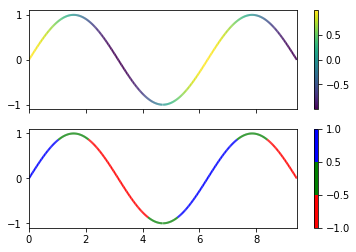

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

A bit small.  Play a hack to make the plot larger.

In [47]:
plt.rcParams["figure.figsize"] = (12, 8)

Try again.

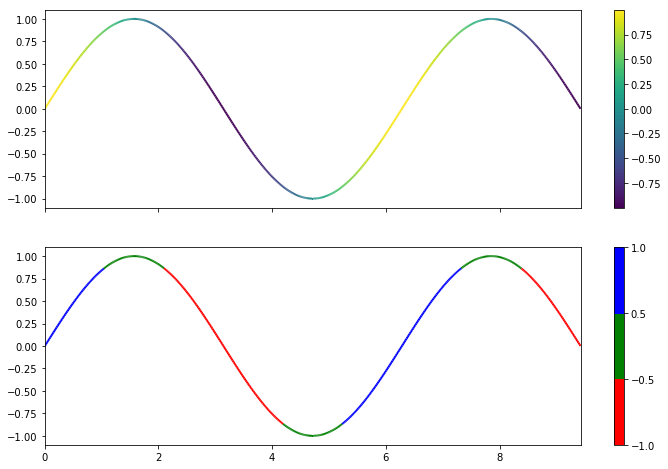

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

# Use a boundary norm instead
cmap = ListedColormap(['r', 'g', 'b'])
norm = BoundaryNorm([-1, -0.5, 0.5, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

# Linear algebra with numpy and scipy

Numpy provides wrappers for BLAS and LAPACK and can readily be used for solving linear systems.  For example, consider the system:

\begin{align*}
 3x_1 +  x_2 + 5x_3 &= 9 \\
  x_1 + 2x_2 +  x_3 &= 8 \\
 4x_1 + 3x_2 +  x_3 &= 2
\end{align*}

In [49]:
a = np.array([[3,1,5], [1,2,1], [4,3,1]])
b = np.array([9,8,2])
x = np.linalg.solve(a, b)
print(x)

[-3.4  4.2  3. ]


In [50]:
print(np.dot(a, x))

[9. 8. 2.]


See https://docs.scipy.org/doc/numpy/reference/routines.linalg.html

# Package managers

To study this course you would need a runtime environment that has the software tools installed.  Although manually building all the dependencies from source is sometimes unavoidable, it's too time-consuming to do it always.

Usually we will use a package manager to help.  A package manager provides recipes for building package from source, and also pre-built binary packages.  It defines the dependencies between the packages.  For example, for scipy to work, numpy needs to be installed beforehand.  A package manager should allow automatic installation of numpy when you request scipy.

In the numerical analysis world, [conda](https://conda.io/) is one of the most versatile package manager that we will use.  There are two major sources of packages:

* Anaconda: https://www.anaconda.com, an open and commercially maintained package repository.
* Conda-forge: https://conda-forge.org, a community maintained package repository.

In addition to conda, [pip](https://pip.pypa.io/) is another popular choice.  "pip is the package installer for Python.  You can use pip to install packages from the [Python Package Index](https://pypi.org/) and other indexes."

# Exercises

1. List all primitive types supported by `numpy.ndarray` on x86-64.
2. Port "`step0.py`" to use bash.
3. Modify the script "`step0.py`" so that it reads the environment variable named "`PYTHON_BIN`" that specifies the location of the Python executable for the script.  Hint: play a trick (or tricks) using bash, and note it's possible to write no-op command in bash.

# References

* [Broadcasting arrays in Numpy](https://eli.thegreenplace.net/2015/broadcasting-arrays-in-numpy/) by Eli Bendersky